# Objective

* Predict whether the parents are satisfied with the performance of students or not

* Yes = Parents Satisfied , No = Not satisfied

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Data Importing

In [2]:
data = pd.read_csv(r'C:\Users\prati\Desktop\Python\Machine Learning\Assignment\LogisticRegressionusingPython\Logistic Regression using Python\xAPI-Edu-Data.csv')
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### Data Pre-Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [5]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

There is no missing values

<AxesSubplot:>

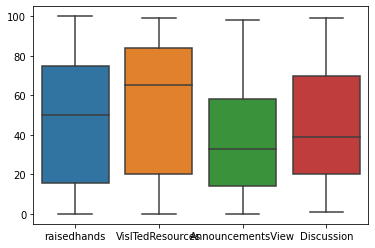

In [6]:
sns.boxplot(data=data)

There are no outliers in the data

### 1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

<AxesSubplot:xlabel='Semester', ylabel='count'>

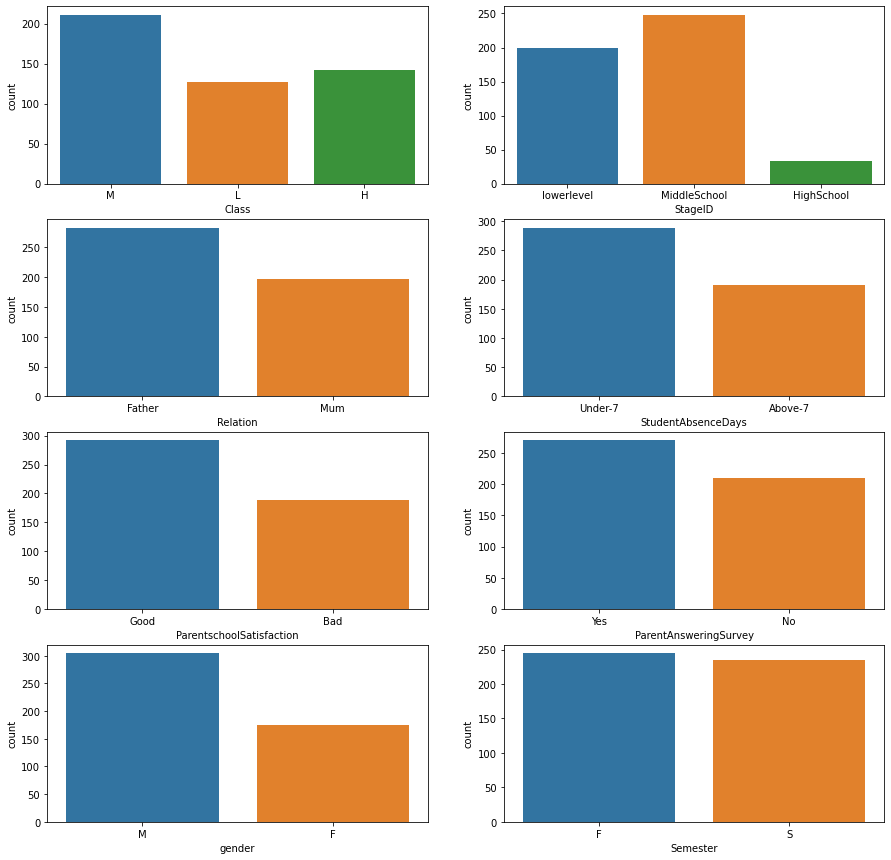

In [7]:
fig,axarr =plt.subplots (4,2, figsize=(15,15))
sns.countplot(x='Class',data=data,ax=axarr[0,0])
sns.countplot(x='StageID',data=data, ax=axarr[0,1])
sns.countplot(x='Relation',data=data, ax=axarr[1,0])
sns.countplot(x='StudentAbsenceDays',data=data, ax=axarr[1,1])
sns.countplot(x='ParentschoolSatisfaction',data=data, ax=axarr[2,0])
sns.countplot(x='ParentAnsweringSurvey',data=data, ax=axarr[2,1])
sns.countplot(x='gender',data=data, ax=axarr[3,0])
sns.countplot(x='Semester',data=data, ax=axarr[3,1])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

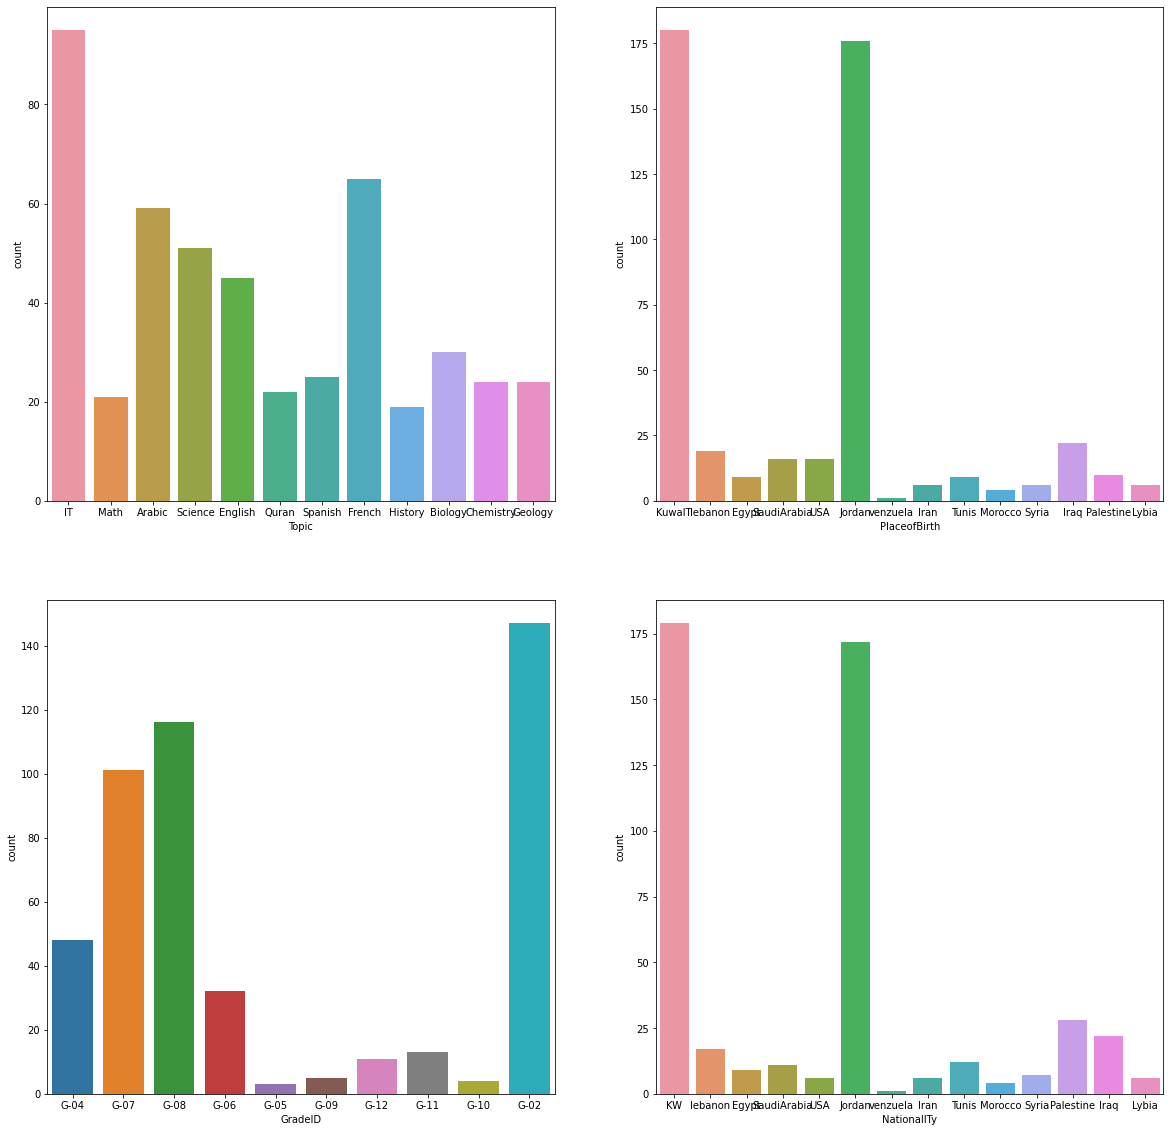

In [8]:
fig,axarr =plt.subplots (2,2, figsize=(20,20))
sns.countplot(x='Topic',data=data,ax=axarr[0,0])
sns.countplot(x='PlaceofBirth',data=data, ax=axarr[0,1])
sns.countplot(x='GradeID',data=data, ax=axarr[1,0])
sns.countplot(x='NationalITy',data=data, ax=axarr[1,1])

* Most of the students seems interested in IT subject
* Most of the belongs to Kuwait
* Most of the students have Grade G-02

<AxesSubplot:xlabel='gender', ylabel='count'>

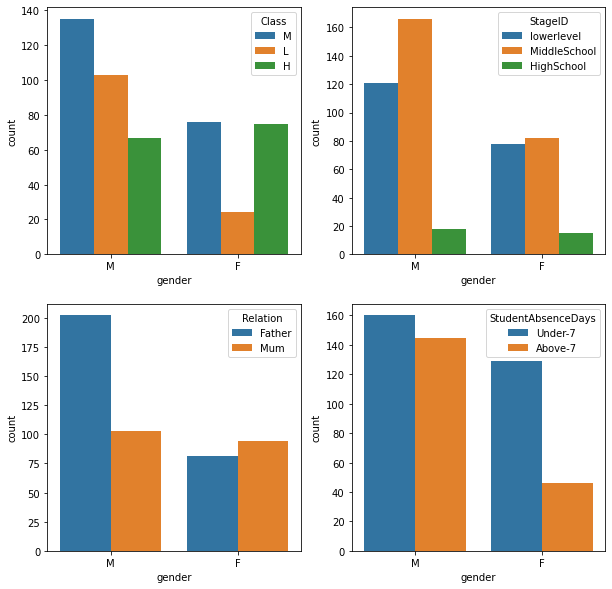

In [9]:
fig,axarr =plt.subplots (2,2, figsize=(10,10))
sns.countplot(x='gender',hue='Class',data=data,ax=axarr[0,0])
sns.countplot(x='gender',hue='StageID',data=data, ax=axarr[0,1])
sns.countplot(x='gender',hue='Relation',data=data, ax=axarr[1,0])
sns.countplot(x='gender',hue='StudentAbsenceDays',data=data, ax=axarr[1,1])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

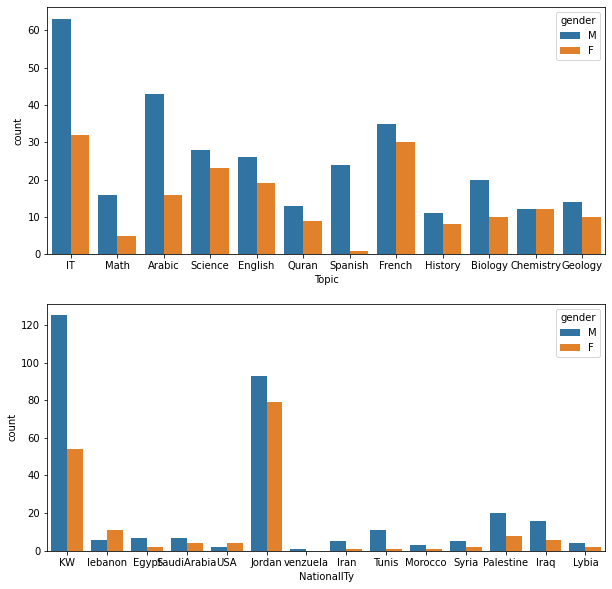

In [10]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='Topic',hue='gender',data=data,ax=axis1)
sns.countplot(x='NationalITy',hue='gender',data=data, ax=axis2)

<AxesSubplot:xlabel='gender', ylabel='count'>

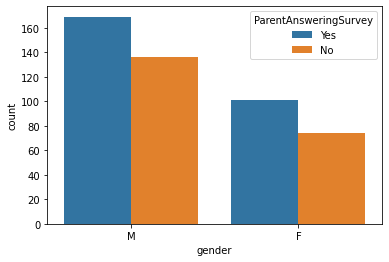

In [11]:
sns.countplot(x='gender',hue='ParentAnsweringSurvey',data=data)

* Males gives more response to survey than female

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

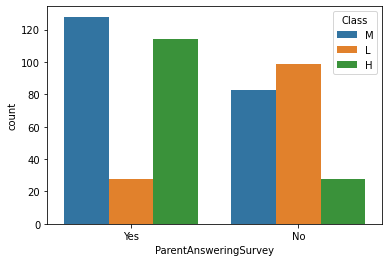

In [12]:
sns.countplot(x='ParentAnsweringSurvey',hue='Class',data=data)

* M-class parents gives higher response to survey

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

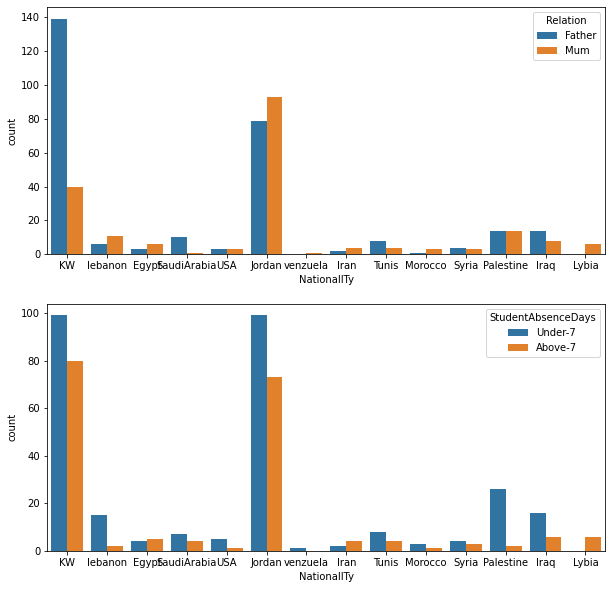

In [13]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='NationalITy',hue='Relation',data=data,ax=axis1)
sns.countplot(x='NationalITy',hue='StudentAbsenceDays',data=data, ax=axis2)

# 2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

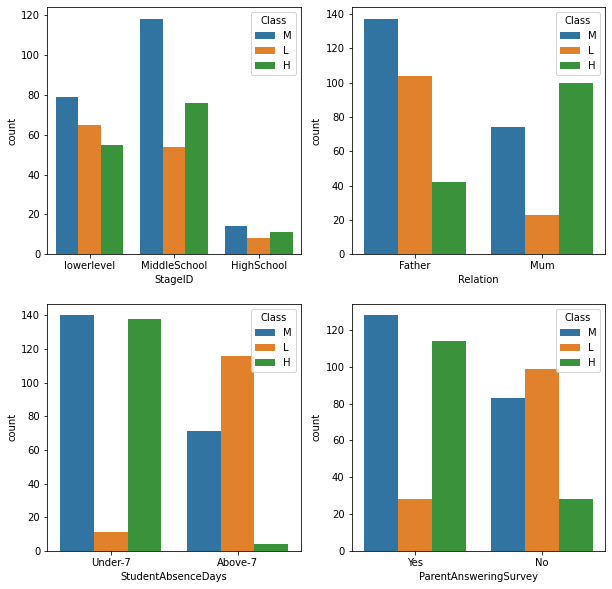

In [14]:
fig,axarr =plt.subplots (2,2, figsize=(10,10))
sns.countplot(x='StageID',hue='Class',data=data,ax=axarr[0,0])
sns.countplot(x='Relation',hue='Class',data=data, ax=axarr[0,1])
sns.countplot(x='StudentAbsenceDays',hue='Class',data=data, ax=axarr[1,0])
sns.countplot(x='ParentAnsweringSurvey',hue='Class',data=data, ax=axarr[1,1])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

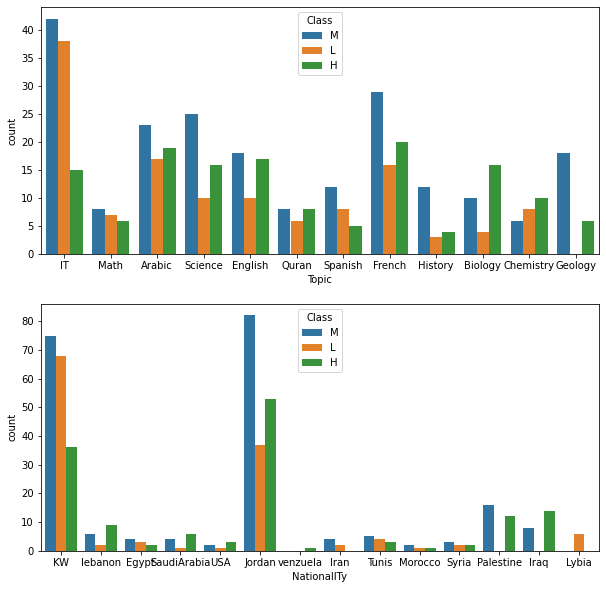

In [15]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='Topic',hue='Class',data=data,ax=axis1)
sns.countplot(x='NationalITy',hue='Class',data=data, ax=axis2)

# 3. Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

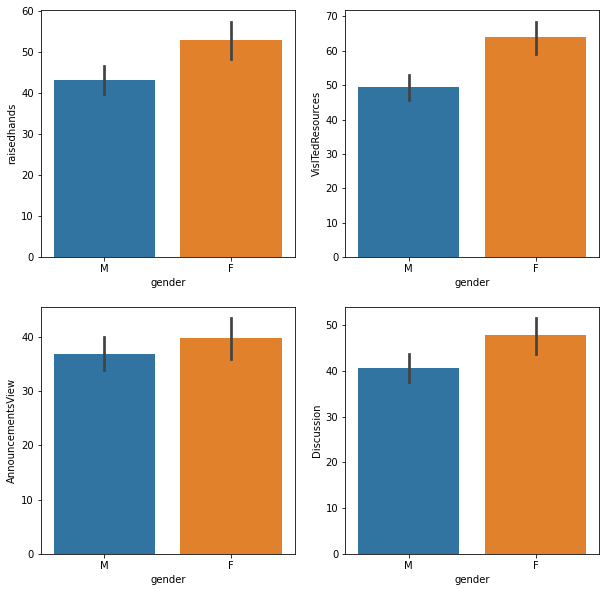

In [16]:
fig,axarr =plt.subplots (2,2, figsize=(10,10))
sns.barplot(x='gender',y='raisedhands',data=data,ax=axarr[0,0])
sns.barplot(x='gender',y='VisITedResources',data=data, ax=axarr[0,1])
sns.barplot(x='gender',y='AnnouncementsView',data=data, ax=axarr[1,0])
sns.barplot(x='gender',y='Discussion',data=data, ax=axarr[1,1])

* Female raised hands more than male
* Female mostly visit resources as compared to male
* Female views annoncements more than male
* Female takes parts in discussion more than male
* It seems females are more interested in studies than male

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

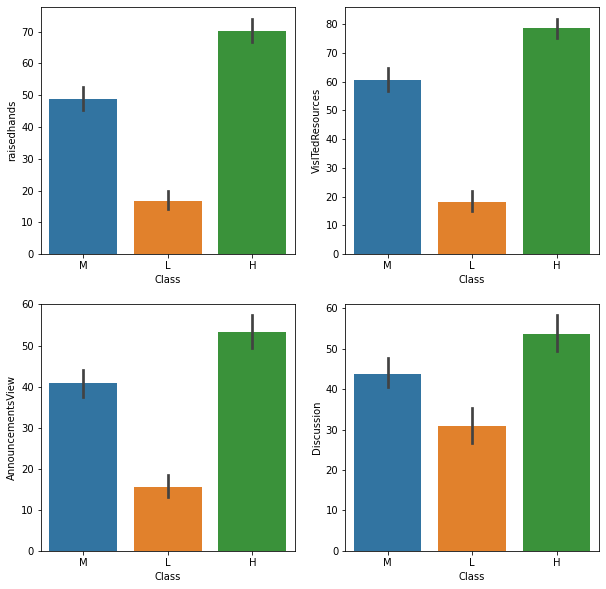

In [17]:
fig,axarr =plt.subplots (2,2, figsize=(10,10))
sns.barplot(x='Class',y='raisedhands',data=data,ax=axarr[0,0])
sns.barplot(x='Class',y='VisITedResources',data=data, ax=axarr[0,1])
sns.barplot(x='Class',y='AnnouncementsView',data=data, ax=axarr[1,0])
sns.barplot(x='Class',y='Discussion',data=data, ax=axarr[1,1])

* It shows H-Class students are more interested in studies and innvolves in every activity.

# 4. From the above result, what are the factors that leads to get low grades of the students?

* Mostly males are absent for more than 7 days, it will lead to their low grades.
* Females are highly involve in school activities as compared to males.

# 5. Build classification model and present it's classification report?

# Data Visualization

### Bad Rate Analysis

In [18]:
data.ParentschoolSatisfaction.value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [19]:
(292/480)*100

60.83333333333333

60.83% parents are satisfied with the students performance

In [20]:
import plotly.express as px

fig = px.pie(data,names='ParentschoolSatisfaction',color='ParentschoolSatisfaction',
             color_discrete_map={'Bad':'red',
                                 'Good':'green'})
fig.show()

## Reject Data

In [21]:
ParentschoolSatisfaction_Good = data[data["ParentschoolSatisfaction"]== "Good"]
ParentschoolSatisfaction_Good

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Mum,87,93,63,60,Yes,Good,Under-7,H
470,M,Palestine,Jordan,MiddleSchool,G-08,A,History,F,Father,81,86,86,41,Yes,Good,Under-7,M
471,M,Palestine,Jordan,MiddleSchool,G-08,A,History,S,Father,78,82,78,53,Yes,Good,Under-7,M
472,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,F,Father,80,87,74,68,Yes,Good,Under-7,M


In [22]:
fig = px.sunburst(ParentschoolSatisfaction_Good, path=["gender",'Relation','NationalITy','StageID','Topic','StudentAbsenceDays',
                                    'Class'])
fig.show()

### Interpretation: Trend Analysis3

* Parents == Male,Father,Kuwait,Middle school, Math, Under-7, Class-M == Parents not Satisfied
* Parents == Female,Mum,Jordan,Middle school,English, Under-7, Class-H == Parents not Satisfied
* Parents == Female,Mum,Jordan,Middle school,Geology, Under-7, Class-H == Parents not Satisfied

# Breaking data into two parts

* Quantitative Variable
* Qualitative Variable

In [23]:
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30


In [24]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L


### Converting qualitative variable into numbers

In [25]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


# Combining Dataset

In [26]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,2,1,0,7,0,0,1,1,1,2,15,16,2,20
1,1,4,4,2,1,0,7,0,0,1,1,1,2,20,20,3,25
2,1,4,4,2,1,0,7,0,0,0,0,0,1,10,7,0,30
3,1,4,4,2,1,0,7,0,0,0,0,0,1,30,25,5,35
4,1,4,4,2,1,0,7,0,0,0,0,0,2,40,50,12,50


# Data Partition

In [27]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('ParentschoolSatisfaction', axis = 1)
Y = Final_combined[['ParentschoolSatisfaction']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=200) # random_state= to fix data

In [28]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,ParentschoolSatisfaction,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
268,0,1,3,3,1,3,0,3,0,0,1,0,2,10,8,10,10
63,0,1,4,4,0,7,0,7,0,0,1,1,2,17,13,16,12
295,1,1,2,2,2,1,0,10,1,0,1,0,2,62,64,72,84
266,1,1,3,3,1,3,0,3,0,0,1,0,2,19,80,12,17
233,1,0,3,3,1,4,1,10,1,1,1,0,2,32,80,58,46


# Model Building

## Hypothesis

* H0 :- There is no log linear relationship between ParentschoolSatisfaction and all independent Variable
* Vs
* H1 :- There is log linear relationship between ParentschoolSatisfaction and all independent Variable 
* Alpha = 0.05 (5%)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

In [30]:
output.intercept_ 

array([0.0803924])

In [31]:
output.coef_

array([[-0.24037999,  0.09534472, -0.26693376,  0.05630865, -0.08923585,
        -0.43180037,  0.02949924, -0.4707643 ,  0.714509  ,  2.25177638,
         0.34851352, -0.25876836,  0.00249487,  0.00938702,  0.00863606,
        -0.01324844]])

In [32]:
output.n_features_in_

16

# Predictions on train dataset

In [33]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction
268,1,3,3,1,3,0,3,0,0,1,0,2,10,8,10,10,0
63,1,4,4,0,7,0,7,0,0,1,1,2,17,13,16,12,0
295,1,2,2,2,1,0,10,1,0,1,0,2,62,64,72,84,1
266,1,3,3,1,3,0,3,0,0,1,0,2,19,80,12,17,1
233,0,3,3,1,4,1,10,1,1,1,0,2,32,80,58,46,1


In [34]:
train['Predicted']=output.predict(X_train)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,Predicted
268,1,3,3,1,3,0,3,0,0,1,0,2,10,8,10,10,0,1
63,1,4,4,0,7,0,7,0,0,1,1,2,17,13,16,12,0,1
295,1,2,2,2,1,0,10,1,0,1,0,2,62,64,72,84,1,1
266,1,3,3,1,3,0,3,0,0,1,0,2,19,80,12,17,1,1
233,0,3,3,1,4,1,10,1,1,1,0,2,32,80,58,46,1,1


# Model Performance Matrix

In [35]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['ParentschoolSatisfaction'])
matrix

array([[109,  28],
       [ 43, 204]], dtype=int64)

In [36]:
Accuracy_Train=((109+204)/(384)*100)
print(Accuracy_Train)

81.51041666666666


Accuracy of model is 81.51%, so we say model is good fit

In [37]:
from sklearn.metrics import classification_report
print(classification_report(train['ParentschoolSatisfaction'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.80      0.72      0.75       152
           1       0.83      0.88      0.85       232

    accuracy                           0.82       384
   macro avg       0.81      0.80      0.80       384
weighted avg       0.81      0.82      0.81       384



* Accuracy of model is 82%, so we say model is good fit
* Accuracy of Bad employee Capture by Model is 72% ( Sensitivity )
* Accuracy of Good employee Capture by Model is 88% (Specificity)

# Predictions on test dataset

In [38]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction
256,0,4,4,2,1,0,6,1,1,0,1,0,80,87,72,60,1
431,1,3,8,1,5,0,5,1,0,0,1,0,80,89,23,68,0
141,1,10,10,1,4,0,9,1,0,0,0,1,19,65,50,10,0
203,0,4,4,1,5,1,0,1,0,1,1,2,22,51,42,40,0
270,0,3,3,1,3,0,3,0,1,0,1,0,90,84,52,30,1


In [39]:
test['Predicted']=output.predict(X_test)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,Predicted
256,0,4,4,2,1,0,6,1,1,0,1,0,80,87,72,60,1,1
431,1,3,8,1,5,0,5,1,0,0,1,0,80,89,23,68,0,0
141,1,10,10,1,4,0,9,1,0,0,0,1,19,65,50,10,0,0
203,0,4,4,1,5,1,0,1,0,1,1,2,22,51,42,40,0,1
270,0,3,3,1,3,0,3,0,1,0,1,0,90,84,52,30,1,1


# Model performance matrix on test data set

In [40]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['ParentschoolSatisfaction'])
print(matrix)

[[29 13]
 [ 7 47]]


In [41]:
Accuracy_test=((29+47)/(96)*100)
Accuracy_test

79.16666666666666

In [42]:
from sklearn.metrics import classification_report
print(classification_report(test['ParentschoolSatisfaction'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74        36
           1       0.87      0.78      0.82        60

    accuracy                           0.79        96
   macro avg       0.78      0.79      0.78        96
weighted avg       0.80      0.79      0.79        96



* Accuracy of model is 79%, so we say model is good fit
* Accuracy of Bad employee Capture by Model is 78% ( Sensitivity )
* Accuracy of Good employee Capture by Model is 81% (Specificity)

# Coefficients

In [43]:
output.intercept_,output.coef_

(array([0.0803924]),
 array([[-0.24037999,  0.09534472, -0.26693376,  0.05630865, -0.08923585,
         -0.43180037,  0.02949924, -0.4707643 ,  0.714509  ,  2.25177638,
          0.34851352, -0.25876836,  0.00249487,  0.00938702,  0.00863606,
         -0.01324844]]))

# Decision Tree

In [44]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)   # dt= model tree name

DecisionTreeClassifier()

In [45]:
features = list(train.columns[1:])
features

['NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'StudentAbsenceDays',
 'Class',
 'raisedhands',
 'VisITedResources',
 'AnnouncementsView',
 'Discussion',
 'ParentschoolSatisfaction',
 'Predicted']

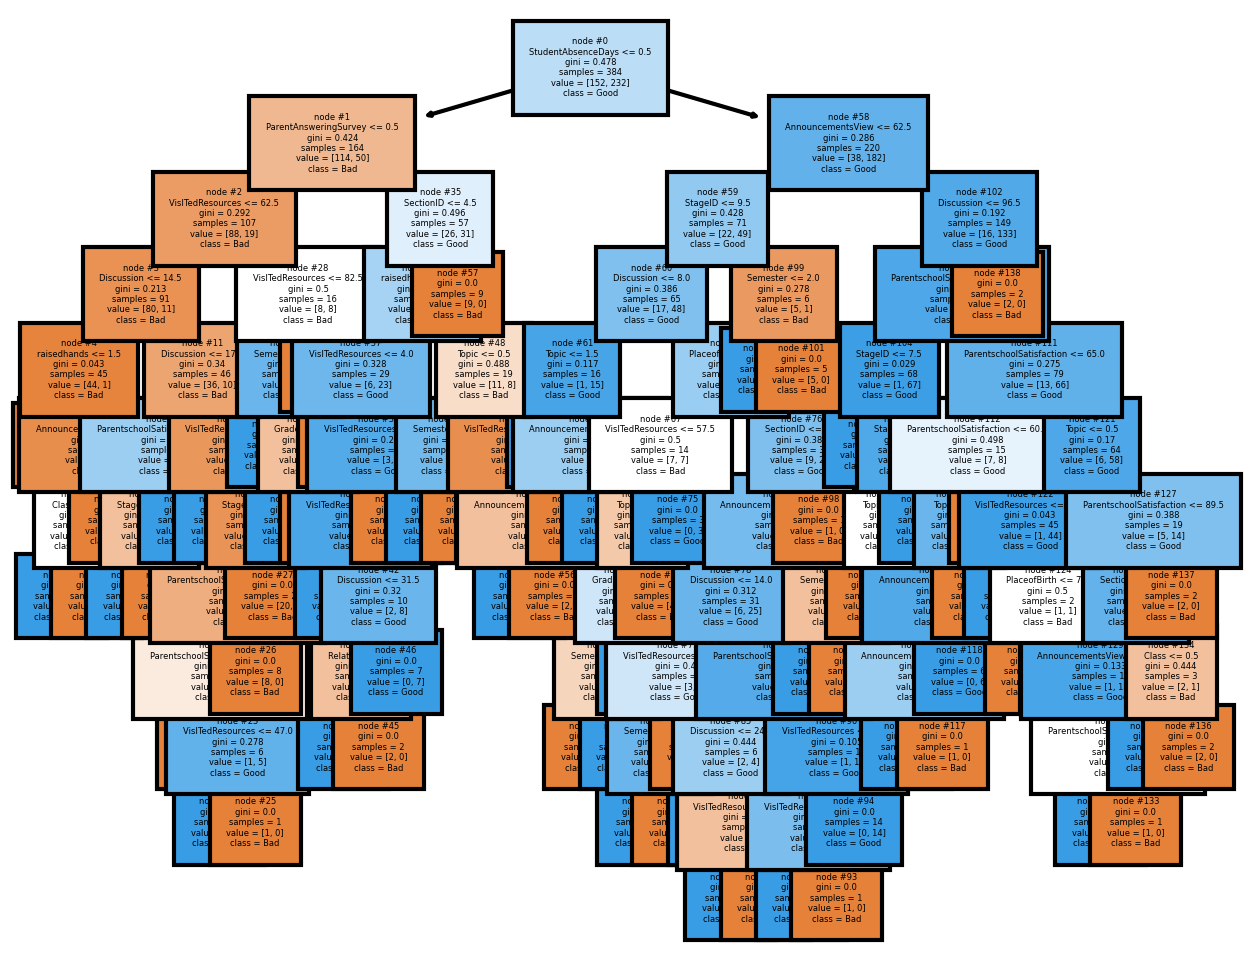

In [46]:
from sklearn import tree
import matplotlib.pyplot as plt

ParentschoolSatisfaction=['Bad', 'Good']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # model
               feature_names = features, 
               class_names=ParentschoolSatisfaction,
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')